# Mini-project-1: Online sales data

## 1.Problem Statement 
###  Why Did Online Sales Drop in June?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
url = r"C:\Users\rohan\OneDrive\Desktop\Jupyter Projects\Notes\CSV Files\sample_online_sales_data.csv"
df = pd.read_csv(url)

In [9]:
df.head()

,Month,Product,Region,Sales,Website_Visitors,Inventory_Status
0,January,Monitor,North,5816,4092,In Stock
1,January,Headphones,East,4077,1330,In Stock
2,January,Keyboard,West,5589,4380,Out of Stock
3,January,Monitor,South,3606,3853,In Stock
4,January,Monitor,North,7194,3300,In Stock


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             600 non-null    object
 1   Product           600 non-null    object
 2   Region            600 non-null    object
 3   Sales             600 non-null    int64 
 4   Website_Visitors  600 non-null    int64 
 5   Inventory_Status  600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [15]:
print("\n The missing values in each columns is : ")
print(df.isnull().sum())


 The missing values in each columns is : 
Month               0
Product             0
Region              0
Sales               0
Website_Visitors    0
Inventory_Status    0
dtype: int64


In [17]:
monthly_sales = df.groupby('Month')['Sales'].sum()

In [18]:
monthly_sales

Month
April       496032
February    490787
January     478121
June        504120
March       496990
May         489206
Name: Sales, dtype: int64

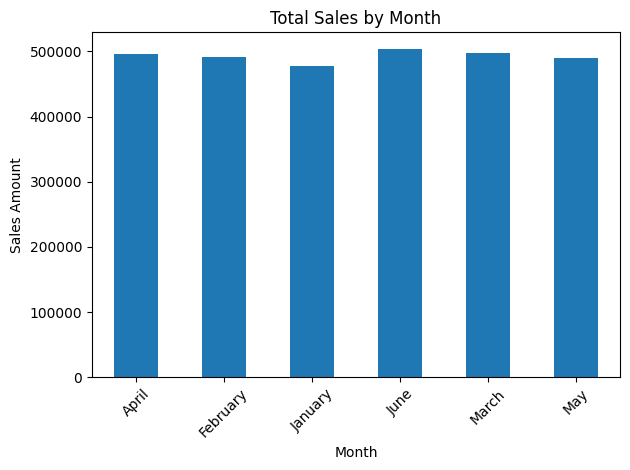

In [24]:
monthly_sales.plot(kind='bar', title = 'Total Sales by Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
monthly_traffic = df.groupby('Month')['Website_Visitors'].mean()
print("\nAverage website visitors by month:")
print(monthly_traffic)


Average website visitors by month:
Month
April       3047.12
February    3022.11
January     3025.55
June        2989.22
March       3084.63
May         2948.92
Name: Website_Visitors, dtype: float64


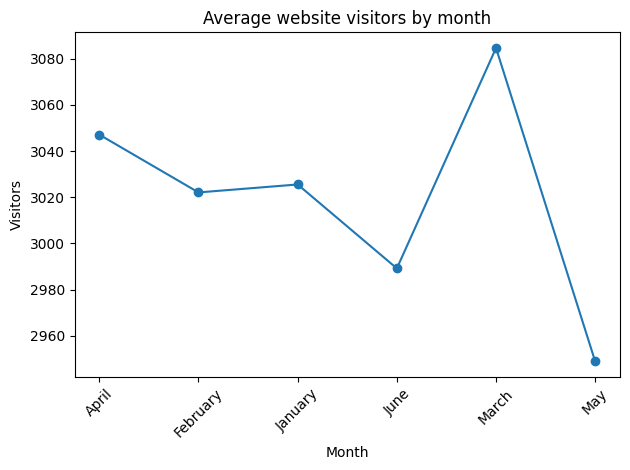

In [35]:
monthly_traffic.plot(kind='line', marker='o', title='Average website visitors by month')
plt.ylabel('Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
june_stock = df[(df['Month'] == 'June') & (df['Inventory_Status'] == 'Out of Stock')]
stock_counts = june_stock['Product'].value_counts()
print("\nOut-of-stock products in June:")
print(stock_counts)



Out-of-stock products in June:
Product
Laptop        19
Smartphone    16
Headphones     2
Mouse          1
Keyboard       1
Name: count, dtype: int64


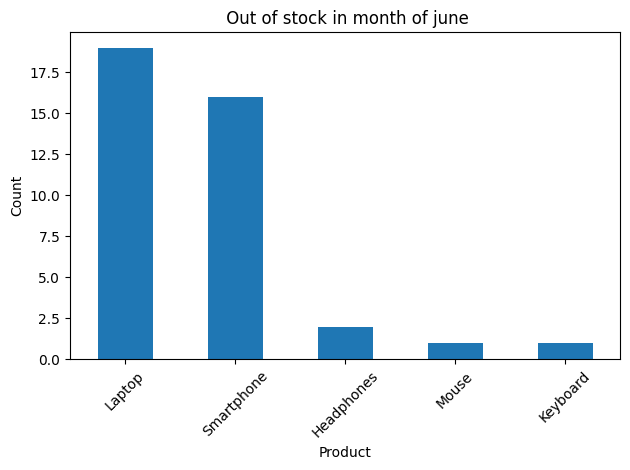

In [39]:
stock_counts.plot(kind='bar', title = ' Out of stock in month of june')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
may_sales = df[df['Month'] == 'May'].groupby('Product')['Sales'].sum()
june_sales = df[df['Month'] == 'June'].groupby('Product')['Sales'].sum()

In [41]:
comparison = pd.DataFrame({
    'May': may_sales,
    'June': june_sales
})

In [44]:
print("\nSales Comparison (May vs June):")
print(comparison)


Sales Comparison (May vs June):
               May    June
Product                   
Headphones   47414   62644
Keyboard     54737   71195
Laptop       96074   94760
Monitor     125661  107289
Mouse        93303   84161
Smartphone   72017   84071


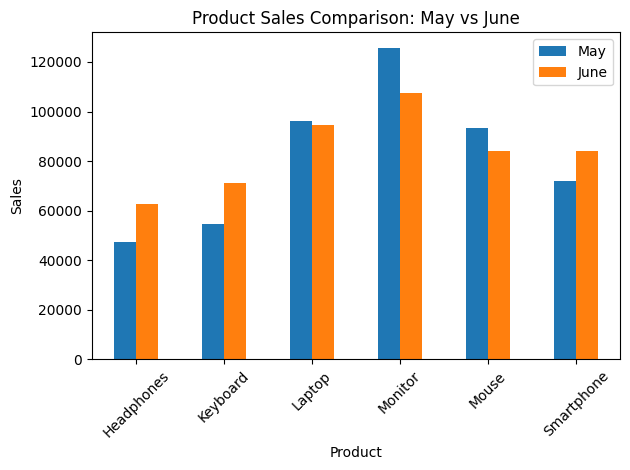

In [45]:
comparison.plot(kind='bar', title='Product Sales Comparison: May vs June')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Conclusion:
### - Website traffic dropped slightly in June.
### - Laptops and Smartphones were frequently out of stock.
### - Some key products saw a drop in sales.

---
## 2.Problem Statement:
### “Which product generated the most revenue overall, and how does it perform across regions?”

In [48]:
total_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending = False)

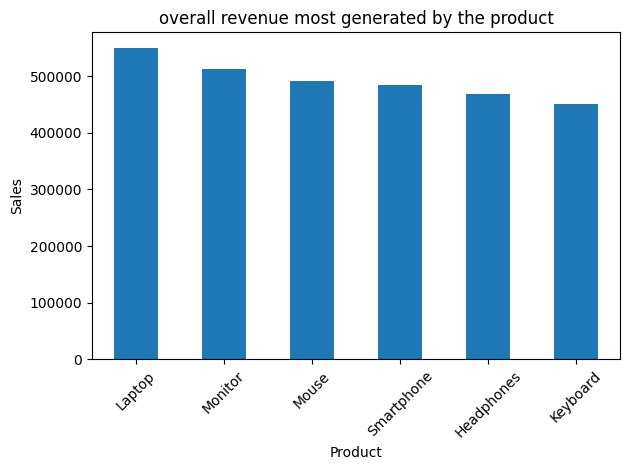

In [49]:
total_sales.plot(kind = 'bar', title = 'overall revenue most generated by the product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
total_reve = df.groupby(['Product','Region'])['Sales'].sum().unstack()

In [52]:
total_reve

Region,East,North,South,West
Product,,,,
Headphones,143864,113498,111347,98903
Keyboard,80050,167558,92429,110428
Laptop,210418,110373,119602,109178
Monitor,95354,149359,160331,106906
Mouse,136576,82955,159581,112452
Smartphone,124489,132009,98770,128826


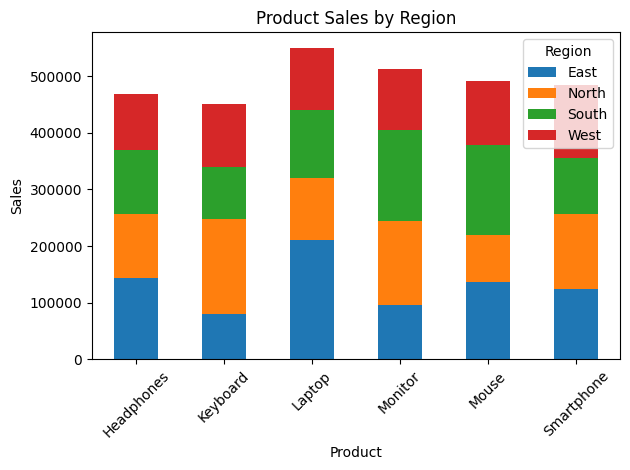

In [54]:
total_reve.plot(kind='bar', stacked=True, title='Product Sales by Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights:
### - This shows which product earned the most overall.
### - Also helps understand regional demand for each product.
### - Useful for planning inventory and regional promotions.


---
## 3.Problem Statement 
### Analyze which regions have the strongest and weakest overall sales trends.

In [55]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

In [56]:
print("\n Total sales in the region ")
print(region_sales)


 Total sales in the region 
Region
East     790751
North    755752
South    742060
West     666693
Name: Sales, dtype: int64


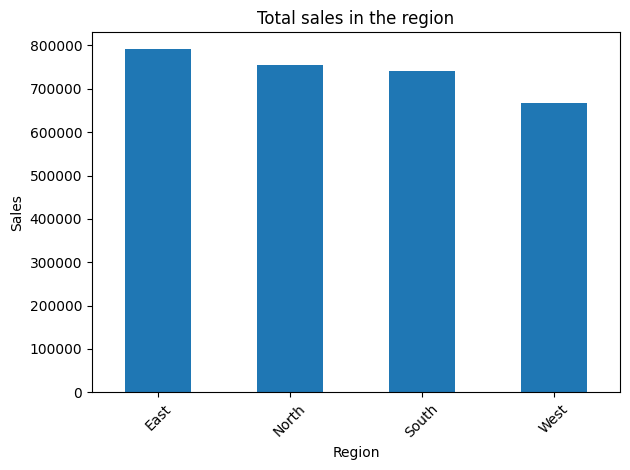

In [57]:
region_sales.plot(kind = 'bar', title = 'Total sales in the region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
monthly_region_sales = df.groupby(['Month','Region'])['Sales'].sum().unstack()
print("\n the monthly sales in the region ")
print(monthly_region_sales)


 the monthly sales in the region 
Region      East   North   South    West
Month                                   
April     108476  114150  159133  114273
February  137135  135465  136048   82139
January   126639  111107  109185  131190
June      107356  136948  135771  124045
March     186570  107080   72804  130536
May       124575  151002  129119   84510


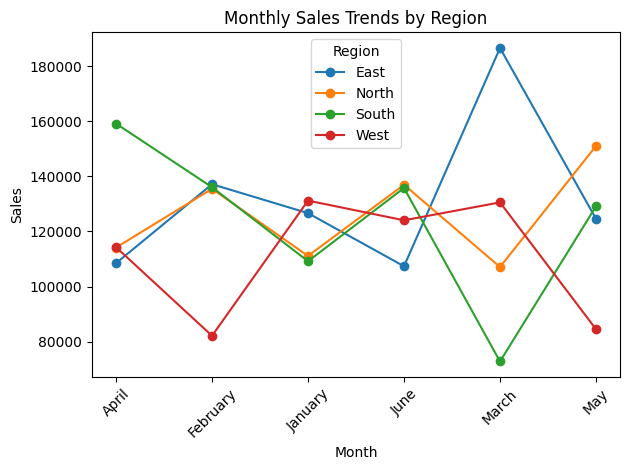

In [62]:
monthly_region_sales.plot(marker='o', title='Monthly Sales Trends by Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights:
### - Identify which regions are consistently high or low in performance.
### - Spot seasonal patterns or sudden drops/spikes.
### - Helps management focus attention on underperforming areas or leverage strong regions.


___
## 4.Problem Statement
### Product-wise Monthly Sales Analysis

In [66]:
monthly_Product_sales = df.groupby(['Month', 'Product'])['Sales'].sum().unstack()
print("\nMonthly sales by product Product:")
print(monthly_Product_sales)


Monthly sales by product Product:
Product   Headphones  Keyboard  Laptop  Monitor  Mouse  Smartphone
Month                                                             
April          87717     78344   55022    89669  97629       87651
February      106081     76171  120156    42994  86328       59057
January        77119     97847   85335    99305  57475       61040
June           62644     71195   94760   107289  84161       84071
March          86637     72171   98224    47032  72668      120258
May            47414     54737   96074   125661  93303       72017


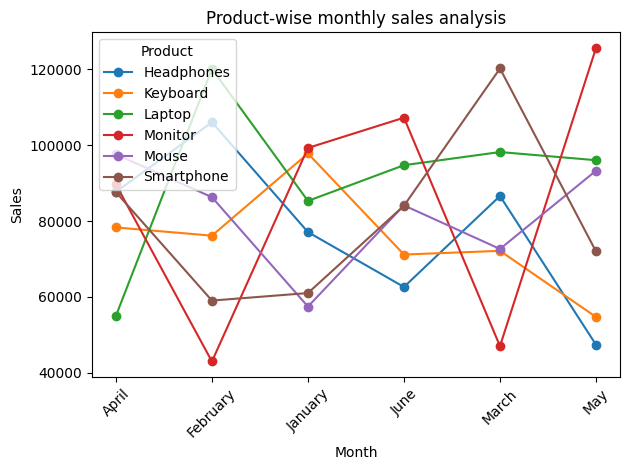

In [72]:
monthly_Product_sales.plot(marker='o', title='Product-wise monthly sales analysis')
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights:
### - Reveals seasonal popularity (e.g., Electronics spike in November).
### - Helps forecast demand per category and manage inventory better.
### - Useful for seasonal marketing or category-specific campaigns.

---